In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [172]:
DATA_PATH = "../data/processed"

# Visualising Age and Gender Data

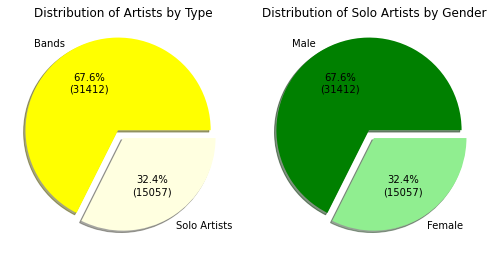

In [173]:
artist_genders = pd.read_csv(DATA_PATH + '/artist_genders.csv', names=['artist', 'gender'])
male_artists = artist_genders.loc[artist_genders['gender'] == 'male']
female_artists = artist_genders.loc[artist_genders['gender'] == 'female']

# Returns percentage and value for pie piece in pie chart 
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,10))
values = [46469-15057, 15057]
ax1.pie(values, labels=['Bands', 'Solo Artists'], autopct=lambda pct: func(pct, values), explode=(0.1, 0), shadow=True, colors=['yellow', 'lightyellow'])
ax1.set_title("Distribution of Artists by Type")
values = [46469-15057, 15057]
ax2.pie(values, labels=['Male', 'Female'], autopct=lambda pct: func(pct, values), explode=(0.1, 0), shadow=True, colors=['green', 'lightgreen'])
ax2.set_title("Distribution of Solo Artists by Gender")
plt.tight_layout() 
plt.show()


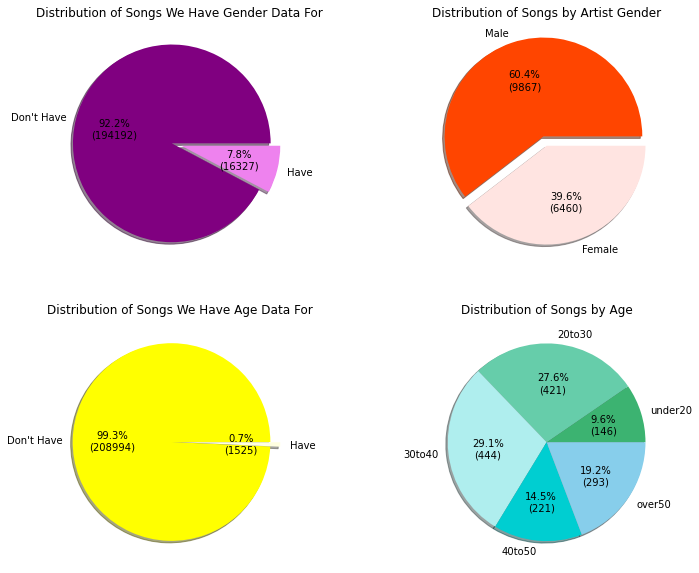

In [174]:
with open(DATA_PATH + '/songs_with_genders.p', "rb") as fp:
    songs = pickle.load(fp)
fp.close()
male_songs = [song for song in songs if song["gender"] == 'male']
female_songs = [song for song in songs if song["gender"] == 'female']

with open(DATA_PATH + '/songs_with_ages.p', "rb") as fp:
    songs_with_age = pickle.load(fp)
fp.close()

def rule(group, song):
    if group == 'under20':
        return int(song["age"]) < 20
    elif group == '20to30':
        return 20 <= int(song["age"]) and int(song["age"]) < 30
    elif group == '30to40':
        return 30 <= int(song["age"]) and int(song["age"]) < 40 
    elif group == '40to50':
        return 40 <= int(song["age"]) and int(song["age"]) < 50
    else:
        return 50 <= int(song["age"])

age_groups = ['under20', '20to30', '30to40', '40to50', 'over50']
len_groups = []
for group in age_groups:
    len_groups.append(len([song for song in songs_with_age if rule(group, song)]))

fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize=(12,10))

values = [210519 - len(songs), len(songs)]
ax1.pie(values, labels=['Don\'t Have', 'Have'], autopct=lambda pct: func(pct, values), explode=(0.1, 0), shadow=True, colors=['purple', 'violet'])
ax1.set_title("Distribution of Songs We Have Gender Data For ")

values = [len(male_songs), len(female_songs)]
ax2.pie(values, labels=['Male', 'Female'], autopct=lambda pct: func(pct, values), explode=(0.1, 0), shadow=True, colors=['orangered', 'mistyrose'])
ax2.set_title("Distribution of Songs by Artist Gender")

values = [210519 - len(songs_with_age), len(songs_with_age)]
ax3.pie(values, labels=['Don\'t Have', 'Have'], autopct=lambda pct: func(pct, values), explode=(0.1, 0), shadow=True, colors=['yellow', 'lightyellow'])
ax3.set_title("Distribution of Songs We Have Age Data For ")

values = len_groups
ax4.pie(values, labels=age_groups, autopct=lambda pct: func(pct, values), shadow=True, colors=['mediumseagreen', 'mediumaquamarine', 'paleturquoise', 'darkturquoise', 'skyblue', 'lightskyblue'])
ax4.set_title("Distribution of Songs by Age")

plt.show() 


# Visualising Offsets

In [188]:
# Get all word frequencies per year from lyrics by male artists
df_song_male = pd.read_csv(f"{DATA_PATH}/freqs_by_gender/male.csv")
df_song_male = df_song_male[df_song_male["year"] >= 1960]
df_song_male = df_song_male.drop(["Unnamed: 0"], axis=1)

# Get all word frequencies per year from lyrics by female artists
df_song_female = pd.read_csv(f"{DATA_PATH}/freqs_by_gender/female.csv")
df_song_female = df_song_female[df_song_female["year"] >= 1960]
df_song_female = df_song_female.drop(["Unnamed: 0"], axis=1)

# Join 
df_joined = pd.merge(df_song_male, df_song_female, how='inner', on=['year', 'word'])
df_joined = df_joined.rename(columns={"freq_x": "freq_male", "freq_y": "freq_female"})

# Get all word frequencies per year from books
df_book = pd.read_csv(f"{DATA_PATH}/book_frequencies.csv", engine='python')
df_book = df_book.drop(["Corpus"], axis=1)
df_book.columns = ["", "year", "word", "freq"]
df_book = df_book.drop([""], axis=1)
df_book = df_book[(df_book["year"] >= 1960) & (df_book["year"] <= 2011)]
df_joined = pd.merge(df_joined, df_book, how='inner', on=['year', 'word'])
df_joined = df_joined.rename(columns={"freq": "freq_books"})

# Get all word frequencies per year from songs
df_song = pd.read_csv(f"{DATA_PATH}/song_frequencies.csv")
df_song = df_song[df_song["year"] >= 1960]
df_joined = pd.merge(df_joined, df_song, how='inner', on=['year', 'word'])
df_joined = df_joined.rename(columns={"freq": "freq_songs"})


df_joined.head()

,year,word,freq_male,freq_female,freq_books,freq_songs
0,1960,i,0.058770,0.043062,0.000183,0.057959
1,1960,the,0.030303,0.026316,0.050315,0.025714
2,1960,you,0.031221,0.035885,0.001260,0.052653
3,1960,to,0.016529,0.009569,0.019079,0.021224
4,1960,and,0.037649,0.026316,0.022593,0.023673


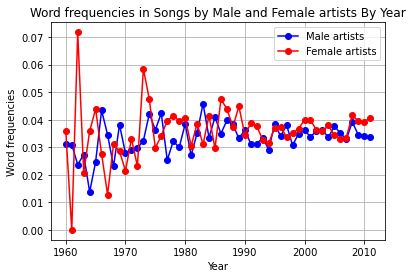

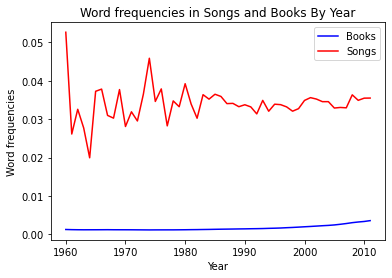

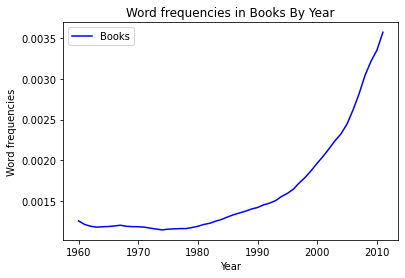

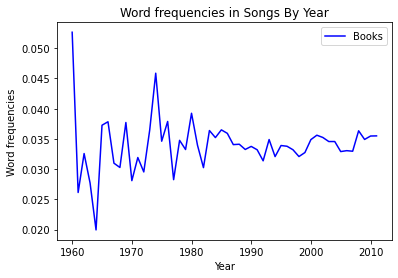

Offset for word "you":  25.0


In [193]:
df_temp = df_joined[df_joined["word"]=="you"]

# See how the frequecy of word "you" has changed over time across artist gender
plt.plot(df_temp["year"], df_temp["freq_male"], color='blue', marker='o', label ="Male artists")
plt.plot(df_temp["year"], df_temp["freq_female"], color='red', marker='o', label ="Female artists")
plt.title('Word frequencies in Songs by Male and Female artists By Year')
plt.xlabel('Year')
plt.ylabel('Word frequencies')
plt.grid(True)
plt.legend()
plt.show()

# See how the frequecy of word "you" has changed over time between songs and books
plt.plot(df_temp["year"], df_temp["freq_books"], color='blue', label ="Books")
plt.plot(df_temp["year"], df_temp["freq_songs"], color='red', label ="Songs")
plt.title('Word frequencies in Songs and Books By Year')
plt.xlabel('Year')
plt.ylabel('Word frequencies')
# plt.grid(True)
plt.legend()
plt.show()

plt.plot(df_temp["year"], df_temp["freq_books"], color='blue', label ="Books")
plt.title('Word frequencies in Books By Year')
plt.xlabel('Year')
plt.ylabel('Word frequencies')
plt.legend()
plt.show()

plt.plot(df_temp["year"], df_temp["freq_songs"], color='blue', label ="Books")
plt.title('Word frequencies in Songs By Year')
plt.xlabel('Year')
plt.ylabel('Word frequencies')
plt.legend()
plt.show()


In [194]:
# Average across years for each word
df_joined = df_joined.groupby('word').mean().reset_index()
df_joined = df_joined.drop(["year"], axis=1)

# Add offsets
df_offsets = pd.read_csv(f"{DATA_PATH}/offsets.csv", sep=',')
df_offsets = df_offsets.replace(np.nan, 0)
df_joined = pd.merge(df_joined, df_offsets, how='inner', on=['word'])

df_joined.head()

,word,freq_male,freq_female,freq_books,freq_songs,offset
0,&,0.000129,0.000215,0.000565,0.000163,2.0
1,1,0.000133,0.000128,0.001969,0.000154,10.0
2,2,0.000142,0.000277,0.001274,0.000218,23.0
3,a,0.019696,0.019812,0.013496,0.020060,24.0
4,about,0.001261,0.001159,0.000972,0.001217,-13.0
